In [1]:
import cv2
import numpy as np
import skimage.data
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Image Channels

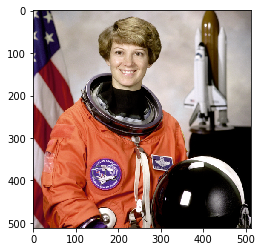

In [2]:
image = skimage.data.astronaut()
plt.imshow(image)

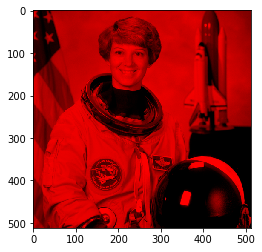

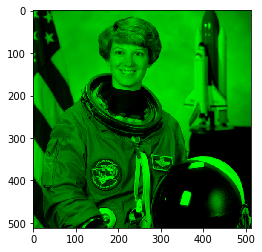

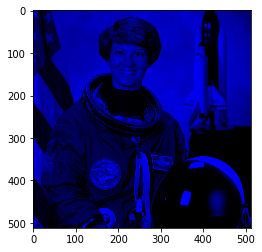

In [3]:
for i in range(3):
    tmp = np.zeros(image.shape, dtype='uint8')
    tmp[:,:,i] = image[:,:,i]
    plt.imshow(tmp)
    plt.show()

### Image Histogram

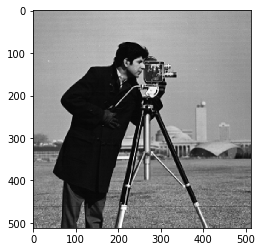

In [4]:
img = skimage.data.camera()

plt.imshow(img, cmap='gray')

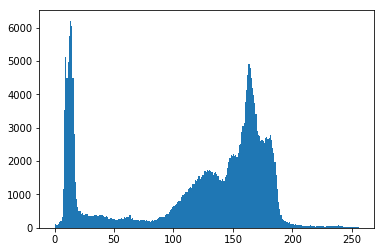

In [5]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

### Adding Noise

Referred code: https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

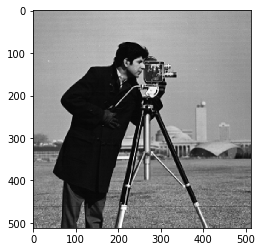

In [6]:
img = skimage.data.camera()

plt.imshow(img, cmap='gray')

Adding salt & pepper noise

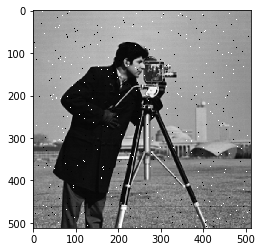

In [7]:
amount = 0.004

img_sp = img.copy()

# Adding Salt
n_salt = int(np.ceil(img.shape[0] * img.shape[1] * amount))
pixels = [np.random.randint(0, i-1, n_salt) for i in img.shape]
img_sp[pixels] = 255

# Adding Pepper
n_pepper = int(np.ceil(img.shape[0] * img.shape[1] * amount))
pixels = [np.random.randint(0, i-1, n_pepper) for i in img.shape]
img_sp[pixels] = 0

plt.imshow(img_sp, cmap='gray')

Adding Gaussian Noise

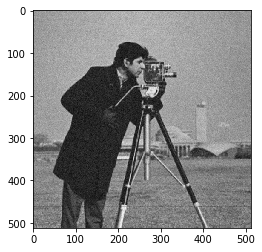

In [8]:
sigma = 10

gauss_noise = np.random.normal(0, sigma, img.shape)
img_gn = img + gauss_noise

plt.imshow(img_gn, cmap='gray')

### Image Shapening

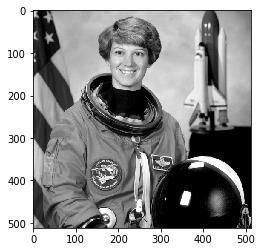

In [9]:
image = skimage.data.astronaut()
image_grayscale = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.

plt.imshow(image_grayscale, cmap = 'gray')

Sharpening using Box Filter

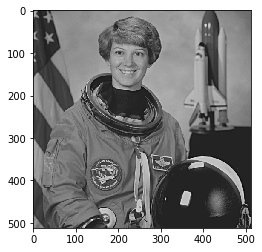

In [10]:
image_grayscale_box_blur = cv2.boxFilter(image_grayscale.copy(), -1, ksize=(9,9))
image_diff_1 = image_grayscale - image_grayscale_box_blur

plt.imshow(image_grayscale + 0.5 * image_diff_1, cmap = 'gray')

Sharpening using Gaussian Filter

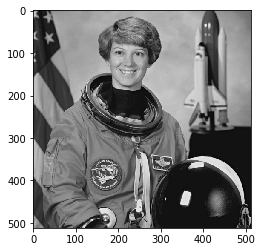

In [11]:
image_grayscale_gaussian_blur = cv2.GaussianBlur(image_grayscale.copy(), ksize=(19,19), sigmaX=-1)
image_diff_2 = image_grayscale - image_grayscale_gaussian_blur

plt.imshow(image_grayscale + 0.2 * image_diff_2, cmap = 'gray')

### Calculating Derivative

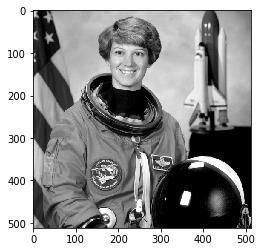

In [12]:
image = skimage.data.astronaut()
image_grayscale = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.

plt.imshow(image_grayscale, cmap = 'gray')

Prewitt Operator

(<matplotlib.axes._subplots.AxesSubplot at 0x112b7a358>,
 <matplotlib.image.AxesImage at 0x112b242b0>)

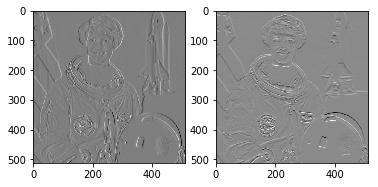

In [13]:
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

prewittx = cv2.filter2D(image_grayscale.copy(), -1, kernelx)
prewitty = cv2.filter2D(image_grayscale.copy(), -1, kernely)

plt.subplot(1,2,1), plt.imshow(prewittx, cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(prewitty, cmap = 'gray')

Prewitt Operator with Thresholding

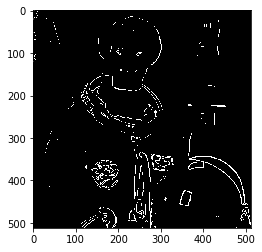

In [14]:
prewitt_m = np.sqrt(np.square(prewittx) + np.square(prewitty))

_,prewitt_f = cv2.threshold(prewitt_m, 1, 255, cv2.THRESH_BINARY)

plt.imshow(prewitt_f, cmap = 'gray')

Sobel Operator

(<matplotlib.axes._subplots.AxesSubplot at 0x1131601d0>,
 <matplotlib.image.AxesImage at 0x112837ba8>)

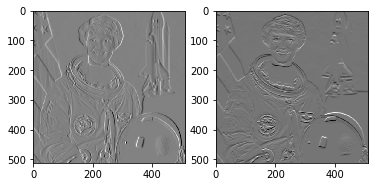

In [15]:
sobelx = cv2.Sobel(image_grayscale.copy(), cv2.CV_64F, 1, 0, ksize=5) 
sobely = cv2.Sobel(image_grayscale.copy(), cv2.CV_64F, 0, 1 ,ksize=5)

plt.subplot(1,2,1), plt.imshow(sobelx, cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(sobely, cmap = 'gray')

Sobel Operator with Thresholding

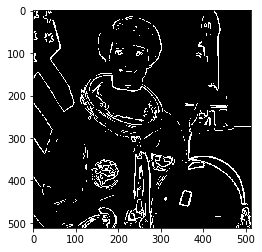

In [16]:
sobel_m = np.sqrt(np.square(sobelx) + np.square(sobely))

_,sobel_f = cv2.threshold(sobel_m, 12, 255, cv2.THRESH_BINARY)

plt.imshow(sobel_f, cmap = 'gray')

### Separability

In [17]:
img = np.random.rand(100, 100)

Comparing Time taken in separability

Using One 2D Kernel. Time Complexity O(n^2)

In [18]:
kernel = np.ones((10, 10), np.float32)

t0 = time.time()
dst = cv2.filter2D(img, -1, kernel)
t1 = time.time()

print(dst)

print("Total time taken: {}".format((t1-t0) * 1000))

[[ 52.73902431  52.73902431  52.58713881 ...,  40.51649925  41.73287952
   40.61535141]
 [ 52.73902431  52.73902431  52.58713881 ...,  40.51649925  41.73287952
   40.61535141]
 [ 51.8863291   51.8863291   52.09340146 ...,  40.34458757  41.35618531
   41.08992469]
 ..., 
 [ 57.53976154  57.53976154  55.73167556 ...,  51.16874432  50.46050134
   47.8764739 ]
 [ 58.82963858  58.82963858  57.71794432 ...,  50.47608336  49.67284878
   47.86875572]
 [ 58.64169524  58.64169524  57.44293418 ...,  48.28205921  47.3281402
   45.01304751]]
Total time taken: 1.2590885162353516


Using two 1D Kernel. Time Complexity O(n)

In [19]:
kernel_1 = np.ones((10,1), np.float32)
kernel_2 = np.ones((1,10), np.float32)

t0 = time.time()
dst = cv2.filter2D(cv2.filter2D(img, -1, kernel_1), -1, kernel_2)
t1 = time.time()

print(dst)

print("Total time taken: {}".format((t1-t0) * 1000))

[[ 52.73902431  52.73902431  52.58713881 ...,  40.51649925  41.73287952
   40.61535141]
 [ 52.73902431  52.73902431  52.58713881 ...,  40.51649925  41.73287952
   40.61535141]
 [ 51.8863291   51.8863291   52.09340146 ...,  40.34458757  41.35618531
   41.08992469]
 ..., 
 [ 57.53976154  57.53976154  55.73167556 ...,  51.16874432  50.46050134
   47.8764739 ]
 [ 58.82963858  58.82963858  57.71794432 ...,  50.47608336  49.67284878
   47.86875572]
 [ 58.64169524  58.64169524  57.44293418 ...,  48.28205921  47.3281402
   45.01304751]]
Total time taken: 0.5140304565429688


### Fourier Transform

Referred Code: https://akshaysin.github.io/fourier_transform.html#.XGdV8uJKhQI

(Text(0.5, 1.0, 'After FFT'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

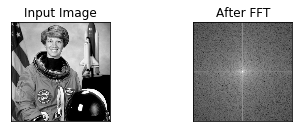

In [20]:
image = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])

In [21]:
# Circular HPF mask, center circle is 0, remaining all ones
rows, cols = image.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 40
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


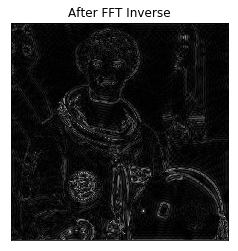

In [22]:
# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse')
plt.xticks([]), plt.yticks([])
plt.show()

#### Lena Image as a surface

Referred Code: https://stackoverflow.com/questions/31805560/how-to-create-surface-plot-from-greyscale-image-with-matplotlib

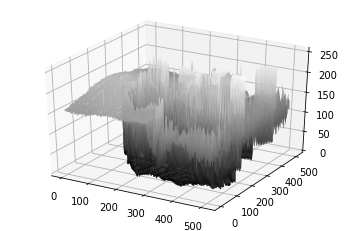

In [23]:
img = skimage.data.camera()

xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)

# show it
plt.show()